$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$
### MEU357 - Méthodes numériques pour les équations différentielles. 2022/23.

# TP1 - La méthode des différences finies pour l'équation de Poisson.

**Remarques importantes** : Dorénavant vous allez programmer des méthodes numériques pour résoudre de manière approchée des EDP, et la complexité de vos programmes augmentera au fur et à mesure. Il faut veiller à respecter les points suivants:

- Vos programmes doivent être ***souples***, ce qui veut dire qu'on devra pouvoir changer les données du problème  sans avoir à tout refaire et même modifier facilement les programmes pour les adapter à un problème plus complexe (avec d'autre type de données, par exemple). Vous devrez donc utiliser des variables pour définir vos données, éventuellement des fonctions externes définies en dehors du programme principal, etc...

- Vos programmes doivent être ***lisibles et compréhensibles*** par quelqu'un d'autre que vous et par vous mêmes si vous y revenez quelques jours plus tard. Il faut donc utiliser des noms cohérents pour les variables, des commentaires pour expliquer le programme, des titres et légendes pour vos graphiques, etc...

Le principe de la **méthode des différences finies** est d'approcher la solution $u$ d'une équation différentielle en un ensemble discret de points du domaine de $u,$ en remplaçant les dérivés de $u$ en ces points par des *quotients de différences finies* qui les approchent. Par exemple, on a pour une fonction $u$ d'une seule variable que sa dérivé en un point $x$ de son domaine vérifie

$$
u'(x)=\lim_{h\to0}\frac{u(x+h)-u(x)}{h}=\lim_{h\to0}\frac{u(x)-u(x-h)}{h}=\lim_{h\to0}\frac{u(x+h)-u(x-h)}{2h}=\dots,
$$

et on peut donc approcher $u'(x)$ par les quotients

$$
\frac{u(x+h)-u(x)}{h},\ \frac{u(x)-u(x-h)}{h},\ \frac{u(x+h)-u(x-h)}{2h},\dots,
$$

avec $h\,$ *petit*.

On verra aussi que si $u$ est deux fois dérivable au point $x,$ alors

$$
u''(x)=\lim_{h\to0}\frac{u(x+h)-2u(x)+u(x-h)}{h^2}.
$$

On peut donc aussi approcher $u''(x)$ par le quotient de différences finies

$$
\frac{u(x+h)-2u(x)+u(x-h)}{h^2},
$$

avec $h$ *petit*.


## Exercice 1. L'équation de Poisson en dimension 1 d'espace avec conditions aux limites de Dirichlet homogènes. 

On s'intéresse à la résolution approchée, par la méthode des différences finies, d'un problème aux limites pour l'équation de Poisson en dimension $1$ d'espace sur $\Omega=]0,1[$, avec conditions aux limites de Dirichlet homogènes
\begin{equation}
(P)\ \ \ \ \ \begin{cases}
-u''(x)=f(x),\ \,x\in]0,1[,\\
u(0)=0,\ \,u(1)=0,
\end{cases}
\end{equation}
où $f\in\mathcal{C}^2(\RR)$ est donnée.

L'idée de la méthode des différences finies pour approcher le problème de Poisson (P) est alors la suivante :
- Discrétiser le domaine $\overline{\Omega}$ ($=[0,1])$ (*le remplacer par un ensemble discret de points*) ;
- Remplacer l'opérateur différentiel $u\mapsto u''$ par l'opérateur aux différences discret
  $$u\mapsto \frac{u(x+h)-2u(x)+u(x-h)}{h^2}$$
  aux points de la discrétisation.

--------------------------------------------------------------------------------------------------------------

**Question 1.** 
  Supposons que $f$ est de classe $C^2$. On peut montrer que la solution $u$ de (P) est alors de classe $C^4$ sur $[0,1]$. Montrer qu'il existe une constante $C>0$, qui ne dépend que de $f$, tel que pour tout $x\in]0,1[$ et pour tout $h>0$ tel que $x\pm h\in]0,1[$ on ait
  
  $$
\Big|u''(x)-\frac{u(x+h)-2u(x)+u(x-h)}{h^2}\Big|\leq Ch^2.
  $$

En particulier, la constante $C$ est indépendante de $h$. 

Ce résultat indique que l'opérateur discret est une approximation *d'ordre 2* de l'opérateur continu.

---------------------------------------------------------------------------------------------------------

En pratique on procède comme suit pour la discrétisation du problème (P) par la méthode des différences finies :

- Discrétisation du domaine $[0,1].$

Pour chaque entier $M\ge1$ donné, on pose $h=\frac{1}{M+1}.$ $h$ est le *pas de la discrétisation*.

Associée à chaque $h$ ainsi défini, on construit une discrétisation uniforme de l'intervalle $[0,1],$ de pas $h,$ donnée par les $M+2$ points

$$
x_j=jh,\ j=0,\dots,M+1.
$$

- Calcul d'une solution approchée aux points de la discrétisation.

Soit $u\in\mathcal{C}^2([0,1])$ la solution du problème (P). On cherche à calculer des valeurs approchées notées $u_j$ de la solution $u$ aux points $x_j,$ autrement dit on cherche $u_j\in\RR,$ pour $j=0,\dots,M+1,$ tel que $u_j\simeq u(x_j).$

Comme la fonction $u$ est solution de (P), on a

$$
-u''(x_j)=f(x_j),\ \textrm{pour }j=1,\dots,M, 
$$

et, puisque $x_0=0$ et $x_{M+1}=1,$

$$
u(x_0)=u(x_{M+1})=0.
$$

La solution $u$ de (P) vérifie alors

$$
-\frac{u(x_j+h)-2u(x_j)+u(x_j-h)}{h^2}\simeq f(x_j),\ \textrm{pour }j=1,\dots,M,
$$

ainsi que $u(x_0)=u(x_{M+1})=0.$ Remarquons que $x_j+h=x_{j+1}$ et $x_j-h=x_{j-1},$ si $j\in\{1,\dots,M\}.$

La méthode des différences finies pour le problème (P) consiste alors à, pour $M>1$ entier positif donné, chercher des réels $u_0,\dots,u_{M+1}$ vérifiant

\begin{equation}
(P_h)\ \ \ \ \   \begin{cases}
    -\frac{1}{h^2}\big(u_{j+1}-2u_{j}+u_{j-1}\big)=f(x_j),\ \  j=1,\dots,M,\\
    u_0=u_{M+1}=0,
  \end{cases}
\end{equation}

où $h=\frac{1}{M+1}$ et $x_j=jh,\ j=0,\dots,M+1.$

-----------------------------------------------------------------------------------------------------------

**Question 2.** On introduit une inconnue discrète $(u_0,\dots,u_{M+1})$, vecteur de $\RR^{M+2}$ dont les composantes sont les valeurs approchées $u_j,\ j=0,\dots,M+1$. Vérifier que le problème discret (P_h) peut s'écrire de manière équivalente :

Pour $M>1,\ M\in\N,$ donné, trouver $(u_0,u_1,\dots,u_M,u_{M+1})\in\RR^{M+2}$ tel que

\begin{equation}
(S)\ \ \ \ \ \begin{cases}
  u_0=u_{M+1}=0,\\
  (S_h)\ \ \ A_h{U_h}=F,
\end{cases}
\end{equation}

où


- $A_h\in\mathcal{M}_M(\RR)$ est la matrice
  \begin{equation*}
A_h=-\frac{1}{h^2}\left[\begin{array}{rrrrrr}
                          -2&1&0&&\cdots&0\\
                          1&-2&1&&\cdots&0\\
                          0&1&-2&&\cdots&0\\
                          \vdots&&\ddots&\ddots&\ddots&\vdots\\
                          0&\cdots&&1&-2&1\\
                          0&\cdots&&0&1&-2
                        \end{array}
                      \right]\ \, ;
  \end{equation*}

- ${U_h}$ est le vecteur de $\RR^M,$ ${U_h}=(u_1,\dots,u_M)^T$ ;

- $F\in\RR^M$ est le vecteur $\big(f(x_1),\dots,f(x_M)\big)^T,$

avec $x_j=jh,\ j=1,\dots,M,\ h=\frac{1}{M+1}.$

-------------------------------------------------------------------------------------------------------------

On a alors remplacé le problème continu (P) par le problème discret (P_h) ou le problème équivalent (S).

Pour des questions pratiques on va résoudre le système $(S_h)$ sous la forme équivalente 

$$
A_M U_h=h^2 F,
$$

où $A_M\in\mathcal{M}_M(\RR)$ est la matrice $h^2 A_h$ (qui ne dépend plus explicitement de $h$ ; rappelons que le pas $h$ et $M$ sont liés par la relation $h=1/(M+1)$). 

On montrera en cours que le système ci-dessus admet une solution, i.e. que $A_M$ est une matrice inversible.

On considère $f(x) = (2\pi)^2 \sin(2\pi x)$, de sorte que la solution du problème $(P)$ est donnée par $u(x) = \sin(2\pi x)$. 

**Question 3.** 
Implementer en python une fonction `A(M)` qui retourne la matrice $A_M$, pour un nombre de points M donné. 

**Question 4.** Soit $M=49$. Obtenir la solution approchée $U_h$ en résolvant le système linéaire $A_M U_h =h^2 F$, en utilisant la fonction de numpy `np.linalg.solve`. Tracer sur la même figure  la solution approchée obtenue et la solution exacte du problème $(P)$.

---------------------------------------------------------------------------------------------------------------

On cherche à illustrer numériquement la convergence du schéma aux différences finies $(P_h)$. On montrera en cours cette convergence : la solution $(u_0,\dots,u_{M+1})$ du problème discret $(P_h)$ approche la solution $u$ du problème continu $(P)$ au sens suivant :

  $$
  \lim_{h\to0}\left(\max_{j=0,\dots,M+1}|u(x_j)-u_j|\right)=0.
  $$

**Question 5.** Pour $M=2^{k}$, et donc pour $h=\frac{1}{2^k +1}$, $2\le k\le 11$, calculer et représenter dans un même graphique la différence en valeur absolue entre la solution exacte aux points $x_j$ et la solution approchée. Observer que cette différence décroit avec $h$.

------------------------------------------------------------------------------------------------------------------

Pour $h>0$ fixé, on note

$$
e_h:=\max_{j=0,\dots,M+1}|u(x_j)-u_j|
$$

l'erreur global du schéma associée à une discrétisation de pas $h$. On montrera en cours que l'on a plus que la convergence

$$
\lim_{h\to0} e_h=0,
$$

on montrera que cette convergence a lieu *au moins à l'ordre 2*, dans le sens que la propriété suivante se vérifie : il existe une constante $C>0$, indépendante de $h$, tel que

$$
e_h\leq C h^2.
$$

**Question 6.**
Calculer, pour chaque valeur de $h$ associée à $M=2^{k}$, $2\le k\le 11$, l'erreur globale en norme infinie entre la solution approchée et la solution exacte, définie par  

$$
e_h=\max_{1\le j\le M}|u_{j}-u(x_{j})|.
$$

Représenter dans une même figure $e/h$ et $e/h^2$ en fonction de $h$ et dans une autre figure $e$ en fonction de $h,$ ainsi qu'une droite de pente 1 et une droite de pente 2, en utilisant une échelle logarithmique. Commenter les résultats obtenus. Que peut-on déduire sur l'ordre du schéma ?


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#question 3:
def A(M,h):
    return -np.eye(M,k=-1) + 2*np.eye(M) - np.eye(M,k=1)

def U(a,b,ua,ub,M,f,mat):
    h = (b-a)/(M+1)
    x = np.linspace(a,b,M+2)
    U = np.zeros(M+2)
    U[0] = ua
    U[-1] = ub
    delta = np.zeros(M)
    delta[0],delta[-1] = ua/h**2 , ub/h**2
    U[1:-1] = np.linalg.solve(mat(M,h),h**2 * (f(x)[1:-1] + delta))
    return U

def plot_graph(a,b,ua,ub,M,f,ex,A):
    uu = U(a,b,ua,ub,M,f,A)
    x = np.linspace(a,b,M+2)
    plt.scatter(x,uu,marker='+',color='r')
    plt.plot(x,ex(x))
    plt.title(f'Solution de l\'équation de Poisson pour {f.__name__}')
    plt.legend(['solution approché','solution exacte'])
    plt.grid(True)
       
def plot_err_log(E,H):
    plt.figure()
    plt.plot(H,E/H,label=f'Eh/h')
    plt.plot(H,E/(H**2),label=f'Eh/h²')
    plt.title('Eh/h et Eh/h² en fontion de h')
    plt.legend()
    plt.grid()
    plt.figure()
    plt.plot(np.log(H),np.log(E),label=f'Eh',marker="+")
    plt.plot(np.log(H),2*np.log(H),label=f'pente deg 2')
    plt.plot(np.log(H),np.log(H),label=f'pente deg 1')
    plt.title('Erreure globale en échelle log')
    plt.legend()
    plt.grid(True)

In [19]:
def f0(x):
    return (2*np.pi)**2 * np.sin(2*np.pi*x)

def uex0(x):
    return np.sin(2*np.pi*x)

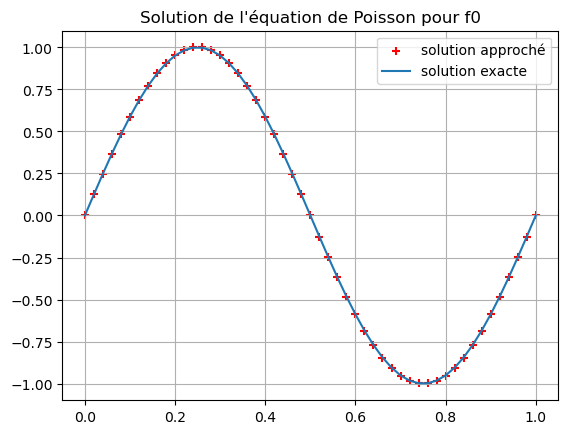

In [20]:
#question 4:
M = 49
a,b = 0,1
ua,ub = 0,0

plot_graph(a,b,ua,ub,M,f0,uex0,A)

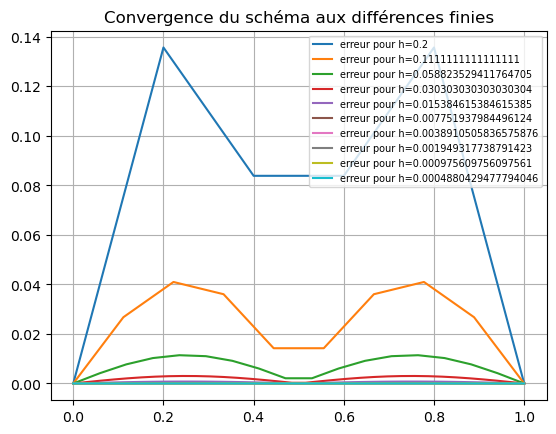

In [21]:
#question 5:
plt.figure()
E = []
H = []

for k in range(2,12):
    M = 2**k
    h = 1/(M+1)
    x = np.linspace(a,b,M+2)
    u = U(a,b,ua,ub,M,f0,A)
    err = abs(uex0(x) - u)
    H.append(h)
    E.append(np.max(err))
    plt.plot(x,err,label=f'erreur pour h={h}')

plt.legend(fontsize = 7,loc=1)
plt.title('Convergence du schéma aux différences finies')
plt.grid()

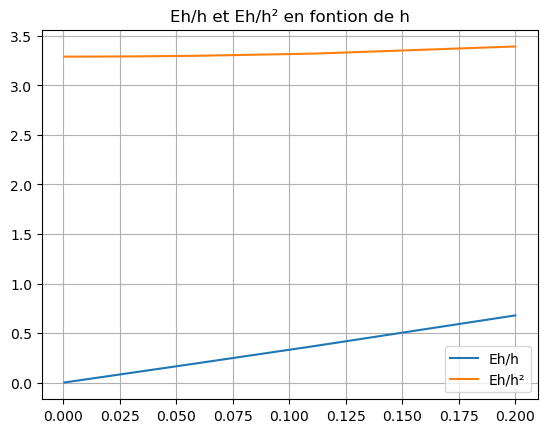

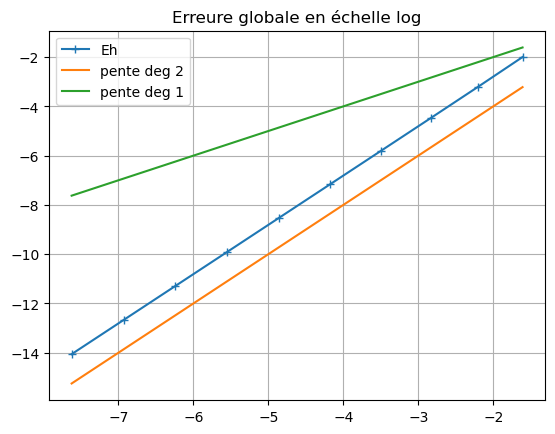

In [6]:
#question 6:
E = np.array(E)
H = np.array(H)

plot_err_log(E,H)

### Exercice 2. Conditions de Dirichlet non homogènes.

On approche à présent le problème de Dirichlet $-u''=f$ dans un intervalle $]a,b[$, avec $a,\ b\in\RR$, avec conditions de Dirichlet non-homogènes : 

$$
\left\{\begin{aligned}
&-u''(x) = f(x) \hbox{ sur } ]a,b[ \\
&u(a) = u_a, u(b) = u_b,
\end{aligned}\right.$$

où $u_a,\ u_b\in\RR$ sont données. En suivant la même démarche que dans l'exercice 1, étant donnée une discrétisation de $]a,b[$ de pas $h=\frac{(b-a)}{M+1}$, on cherche une solution approchée $(u_0,\dots,u_{M+1})$ solution du système linéaire suivant : 

$$
\left\{\begin{aligned}
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1}) = f(x_i) \hbox{ pour } 1\leq i\leq M \\
&u_{0} = u_a, u_{M+1} = u_b,
\end{aligned}\right.$$

où la discrétisation considérée de l'intervalle $[a,b]$ est définie par les $M+2$ points $x_i=a+ih,\ i=0,\dots,M+1$.

**Question 1.** Mettre ce système sous la forme $A_h U_h = F+\Delta$, où $\Delta \in\RR^M$ est un vecteur à déterminer.

**Question 2.** 
Donner la solution exacte du problème 
$$
\left\{\begin{aligned}
&-u''(x) = 1 \hbox{ sur } ]1,2[, \\
&u(1) = 1, u(2) = 2.
\end{aligned}\right.$$

**Question 3.** En suivant la démarche de l'exercice 1, calculer une solution approchée de ce problème par la méthode des différences finies, et représenter dans la même figure la solution exacte et la solution approchée. Refaire dans une autre figure les calculs de la question 5 de l'exercice 1. Refaire l'exercice pour le problème

$$
\left\{\begin{aligned}
&-u''(x) = -\frac{2}{(x+1)^3} \hbox{ sur } ]1,2[ \\
&u(1) = 1/2, u(2) = 1/3,
\end{aligned}\right.$$

dont la solution exacte est donnée par $u(x)=\frac{1}{x+1}$. Chercher à comprendre les résultats obtenus.

In [22]:
def f1(x):
    return -2/(x+1)**3

def uex1(x):
    return 1/(x+1)

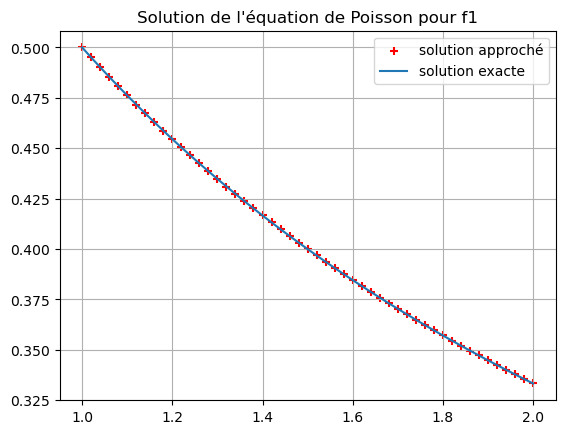

In [23]:
M = 49
a,b = 1,2
ua,ub = 1/2,1/3

plot_graph(a,b,ua,ub,M,f1,uex1,A)

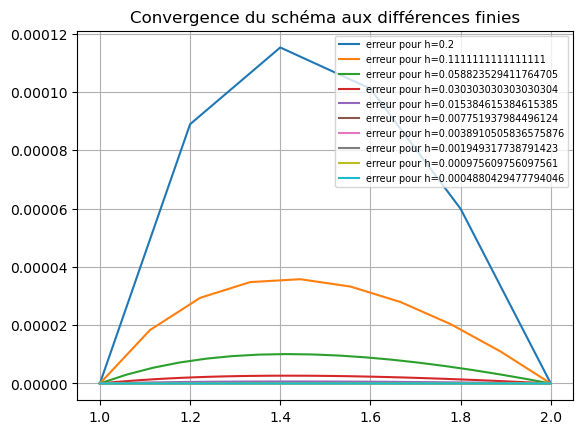

In [24]:
plt.figure()
E = []
H = []

for k in range(2,12):
    M = 2**k
    h = 1/(M+1)
    x = np.linspace(a,b,M+2)
    u1 = U(a,b,ua,ub,M,f1,A)
    err1 = abs(uex1(x) - u1)
    H.append(h)
    E.append(np.max(err1))
    plt.plot(x,err1,label=f'erreur pour h={h}')
    
plt.legend(fontsize = 7,loc=1)
plt.title('Convergence du schéma aux différences finies')
plt.grid()

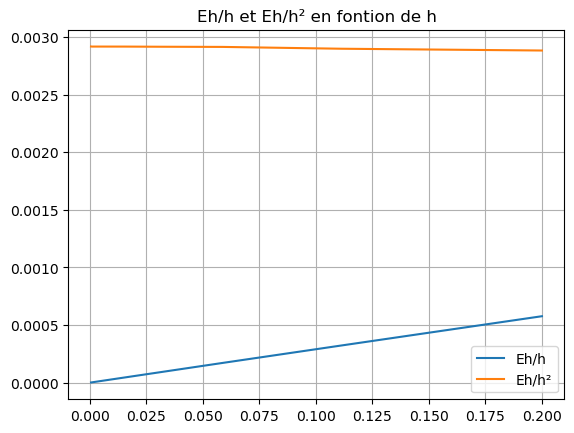

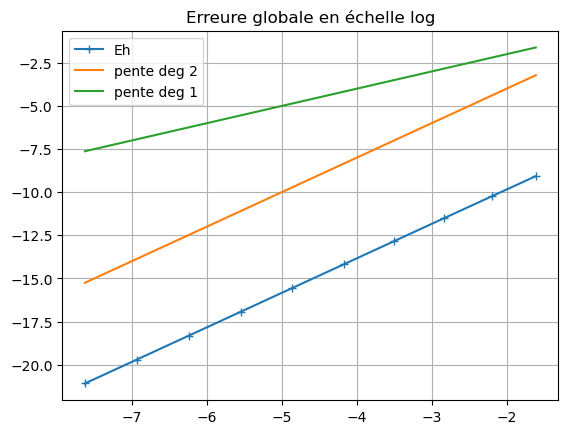

In [10]:
E = np.array(E)
H = np.array(H)

plot_err_log(E,H)

# Exercice 3. Conditions aux limites de Neumann.

On approche dans cet exercice le problème $-u'' + u=f$ dans $]0,1[$, avec conditions aux limites dites de Neumann (homogènes) : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(x) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0.
\end{aligned}\right.$$

On considère la même discrétisation que dans l'exercice 1 de l'intervalle $[0,1]$ et on effectue les approximations suivantes des dérivées de la solution $u$ aux points 0 et 1 :

$$
u'(0)\simeq \frac{u(h)-u(0)}{h},\ \ \ \ \ u'(1)\simeq \frac{u(1)-u(1-h)}{h}
$$

On cherche alors, pour $M>0$ donné et $h=\frac{1}{M+1}$, des valeurs $u_0,\dots,u_{M+1}$ solutions du système linéaire 

$$
\left\{\begin{aligned}
&\frac{u_{1} - u_0}{h} = 0,\ \ \ \ \  \frac{u_{M+1} - u_M}{h} = 0 \\[4pt]
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1})+u_i = f(x_i) \hbox{ pour } 1\leq i\leq M
\end{aligned}\right.,$$

où $x_j = h j$ pour $0\leq j\leq M+1$, approchant les valeurs $u(x_0),\dots,u(x_{M+1})$ de la solution exacte aux points $x_0,\dots,x_{M+1}$.

Le problème discret peut être écrit à nouveau sous la forme $({A_N}_h + I_M)U = F$ où ${A_N}_h$ est une matrice de taille $M\times M$, $I_M$ la matrice l'identité de taille $M$, $U = (u_1,\dots,u_{M}) \in\RR^M$, et où $F = (f(x_1),\dots,f(x_M))$.

**Question 1.** Donner l'expression de la matrice ${A_N}_h$. On peut écrire le système $({A_N}_h + I_M)U = F$ sous la forme équivalente $h^2({A_N}_h + I_M)U = h^2F$. Implémenter la matrice $A_N:=h^2{A_N}_h$ dans une fonction python.

**Question 2.** En prenant $f(x) = ((2\pi)^2 + 1) \cos(2\pi x)$ (et on a donc $u(x) = \cos(2\pi x)$), refaire les mêmes figures que dans l'exercice 1. Montrer que la convergence dans ce cas est d'ordre $1$ mais pas d'ordre $2$.

In [11]:
def An(M,h):
    A = -np.eye(M,k=-1) + 2*np.eye(M) - np.eye(M,k=1)
    A[0,0],A[-1,-1] = 1,1
    A += (h**2)*np.eye(M)
    return A

In [12]:
def f2(x):
    return ((2*np.pi)**2 + 1)*np.cos(2*np.pi*x)

def uex2(x):
    return np.cos(2*np.pi*x)

def U2(a,b,M,f,mat):
    h = (b-a)/(M+1)
    x = np.linspace(a,b,M+2)
    U = np.zeros(M+2)
    U[1:-1] = np.linalg.solve(mat(M,h),h**2 * f(x)[1:-1])
    U[0],U[-1] = U[1],U[-2]
    return U

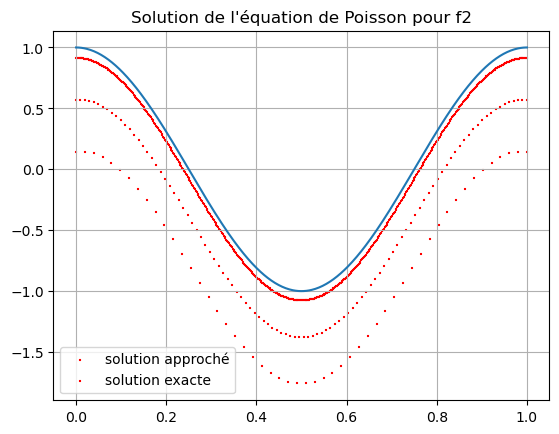

In [13]:
a,b = 0,1
x = np.linspace(a,b,M+2)

for M in [50,100,500]:
    u2 = U2(a,b,M,f2,An)
    x = np.linspace(a,b,M+2)
    plt.scatter(x,u2,marker='+',color='r',s=4)
    plt.legend(['solution approché','solution exacte'])
    plt.title(f'Solution de l\'équation de Poisson pour f2')
    plt.grid()
    
plt.plot(x,uex2(x))
plt.show()

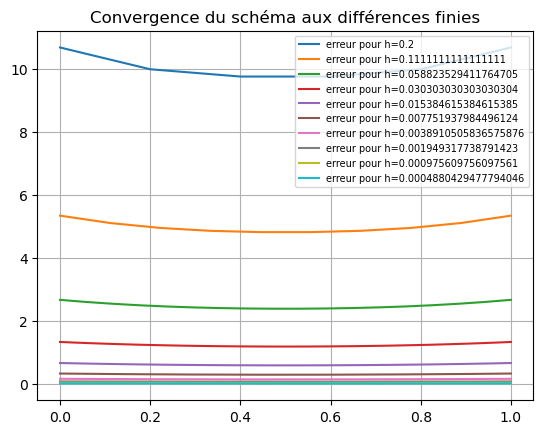

In [14]:
E = []
H = []

plt.figure()
M = 100
for k in range(2,12):
    M = 2**k
    h = 1/(M+1)
    u2 = U2(a,b,M,f2,An)
    x = np.linspace(a,b,M+2)
    err2 = abs(uex2(x) - u2)
    H.append(h)
    E.append(np.max(err2))
    plt.plot(x,err2,label=f'erreur pour h={h}')
    
plt.legend(fontsize = 7,loc=1)
plt.title('Convergence du schéma aux différences finies')
plt.grid()

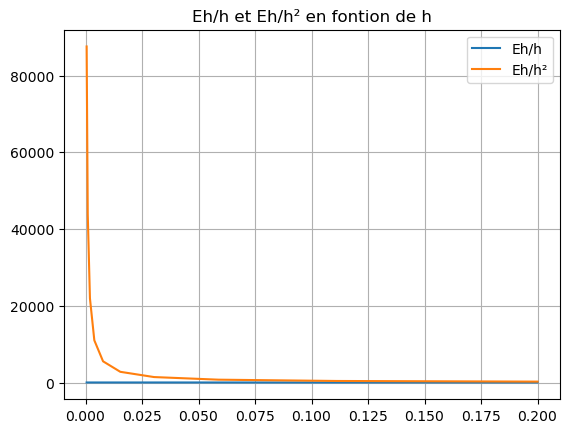

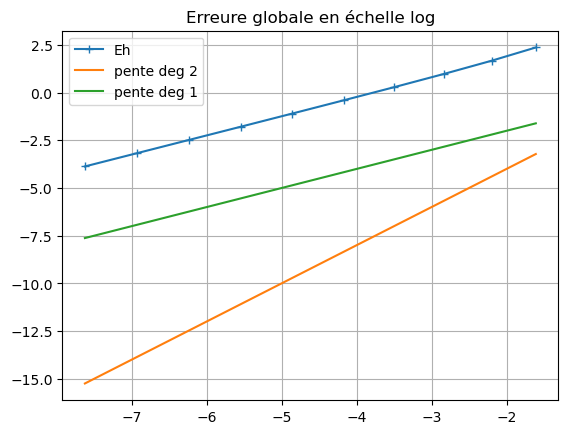

In [15]:
E = np.array(E)
H = np.array(H)

plot_err_log(E,H)

## Exercice 4. Méthode d'ordre 2 pour les conditions de Neumann

On considère à nouveau le problème $-u'' + u=f$ avec conditions de Neumann : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(x) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0
\end{aligned}\right.$$

**Question 1 :** En partant de l'égalité
$ u(h) = u(0) + hu'(0) + \frac{h^2}{2} u''(0) + O(h^3), $
réécrite sous la forme

$$
\begin{align*}
u'(0) &= \frac{1}{h} (u(h) - u(0)) - \frac{h}{2} u''(0) + O(h^2) \\
&= \frac{1}{h} (u(h) - u(0)) + \frac{h}{2} (f(0) - u(0))  + O(h^2) 
\end{align*}
$$

proposer une discrétisation d'ordre deux pour la condition $ u'(0) = 0 $. Mettre le schéma sous la forme $ AU = F + \Delta $ où $ A $ (taille $ M\times M $) et $ \Delta\in\RR^M $ sont à déterminer.

**Question 2 :** Vérifier numériquement qu'on obtient effectivement une méthode d'ordre $2$.

## Exercice 5. Pour aller plus loin.

Vous pourrez tester un problème de Neumann dans un intervalle $]a,b[$ autre que $]0,1[$, avec des conditions aux limites de Neumann non homogènes, c'est-à-dire du type $u'(a)=\alpha,\ u'(b)=\beta$, avec $\alpha,\ \beta\in\RR$ pas forcément égaux à 0.

*Pour considérer un tel problème, vous pouvez partir d'une fonction $u$ que vous choisirez (cette fonction sera la solution de votre problème), prendre comme second membre $f$ la fonction correspondante à $-u''+u$, prendre un intrevalle $[a,b]$ de votre choix et $\alpha,\ \beta$ égaux respectivement aux valeurs $u'(a),\ u'(b)$.* 

## Exercice 6. Une application au traitement de signal.

On s'intéresse à un problème de *débruitage*. Étant donné un signal 1D, $v:[0,1]\to\mathbb{R}$, continu, et un paramètre $\alpha > 0$, on cherche à construire un signal régularisé en résolvant l'équation différentielle

$$
(D)\hspace{3cm} \left\{\begin{aligned}
&-u''(x) + \alpha (u(x) - v(x)) = 0 \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0
\end{aligned}\right.$$

On remarque que si $\alpha\to\infty$, on obtient formellement comme solution de l'équation $(D)$ $u=v$. D'autre part, on peut montrer comme on l'a fait pour le problème de Poisson avec conditions aux limites de Dirichlet, que la solution de $(D)$ est une fonction de classe $C^2$. L'idée alors pour obtenir une *régularisation* du signal $v$ est de résoudre $(D)$ pour une valeur de $\alpha$ grande.

On discrétise $(D)$ de la manière suivante. Étant donnée une discrétisation de $]0,1[$ de pas $h=\frac{1}{M+1}$,  avec $M>0$ donné, définie par les points $x_i=ih,\ i=0,\dots,M+1$, on cherche une solution approchée $(u_0,\dots,u_{M+1})$ vérifiant :

$$
(D_h)\hspace{3cm} \left\{\begin{aligned}
&u_{0} = u_1, u_{M+1} = u_M\\
&-\frac{1}{h^2\alpha}(u_{i-1} - 2 u_i + u_{i+1}) + u_i = v_i, \hbox{ pour } 1\leq i\leq M,
\end{aligned}\right.$$

où $v_i = v(x_i)$. 

**Question 1** Mettre le système $(D_h)$ sous la forme $A_M U = F$ où la matrice $A_M$ et le vecteur $F$ sont à construire. Écrire une fonction python $A(M,alpha)$ construisant la matrice $A_M$.

**Question 2** Considérer le signal $v$ défini ci-dessous, auquel on a rajouté un bruit uniforme, à travers la fonction random.random de numpy. Pour $M=99$ et pour les valeurs de $\alpha=50,100,1000,10000$, résoudre numériquement le système $D_h$. Représenter le signal $v$ ainsi que les solutions approchées obtenues pour les différentes valeurs de $\alpha$. 


In [16]:
def v(x):
    return 4*np.exp(-500*np.square(x-.8)) + np.exp(-50*np.square(x-.2))+.5*np.random.random(x.shape)